In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## SARIMA Machine Learning Algorithm

In [2]:
casesURL = "https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/cases-rki-by-state.csv"
df=pd.read_csv(casesURL)

df = df.loc[:, ['time_iso8601','DE-BW']]
df["dailyChange"] =  df['DE-BW'].diff().fillna(df['DE-BW'])
df.drop(['DE-BW'], axis=1, inplace=True)

## Create my Numpy Array
df["dailyChange"] = df["dailyChange"].apply(np.int64)
npArray = np.empty(shape=(1,len(df.index)), dtype=int)
## Filling numpy array with values // specify training data
for i in range (len(df.index)):
    npArray[0][i] = df['dailyChange'][i]

### Define Model

In [3]:
## SARIMA(p,d,q)(P,D,Q)m
## Test Configuration
myOrder = (2, 2, 1)
mySeasonal_order = (2, 1, 1, 12)
model = SARIMAX(npArray[0], order=myOrder, seasonal_order=mySeasonal_order)
## Fit Model
model_fit = model.fit(disp=False)
## Make Prediction
yhat = model_fit.predict(start=len(npArray[0]), end=len(npArray[0]))
prediction = 20
## forecast on data
#forcasPredic = model_fit.forecast(prediction)
# Make prediction
predicYhat = model_fit.predict(1, (npArray.size + prediction))

In [4]:
def zeroToNan(values):
    return [float('nan') if x==0 else x for x in values]

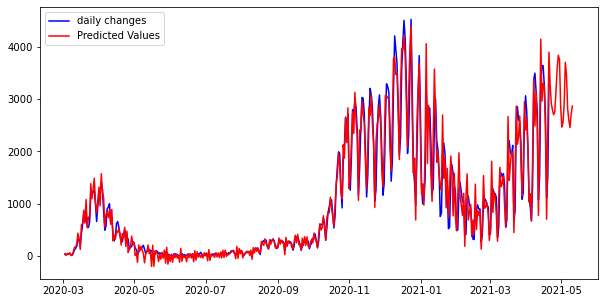

In [5]:
# Adding the future values so dates index match wit x index
npTemp = np.zeros((prediction), dtype=int)
npAddedValues= np.concatenate((npArray[0], npTemp), axis=None)
# Also matching the forecasted values to the x index
npTemp = np.zeros((npArray[0].size), dtype=int)
#npAddesforcPred = np.concatenate((npTemp,forcasPredic), axis=None)
# Change all Zeros to nan so matlatlib doesnt print it
npAddedValues = zeroToNan(npAddedValues)
#npAddesforcPred = zeroToNan(npAddesforcPred)
# Setting plot options
df2 = pd.date_range(start=df['time_iso8601'][0], periods=len(df)+prediction, freq='D')
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(df2, npAddedValues, 'b', label = 'daily changes', linewidth = 1.5)
plt.plot(df2, predicYhat, 'r', label = 'Predicted Values')
#plt.plot(df2, npAddesforcPred, 'g', label = 'Forecasted value')
plt.legend()
plt.show()
## PROBLEM WIE BESTIMMT MAN DIE WERTE? HIER VORHERSAGE ABER BEACHTET NICHT "SINUS" ARTIGES aussehen
## SARIMAX exogenous variables (Selbe daten oder daten aus einer anderen Quelle)